<a href="https://colab.research.google.com/github/zackdihel/ECON-5200-Data-Analytics/blob/main/Lab%207/%5BLab_7%5D_The_Engine_of_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

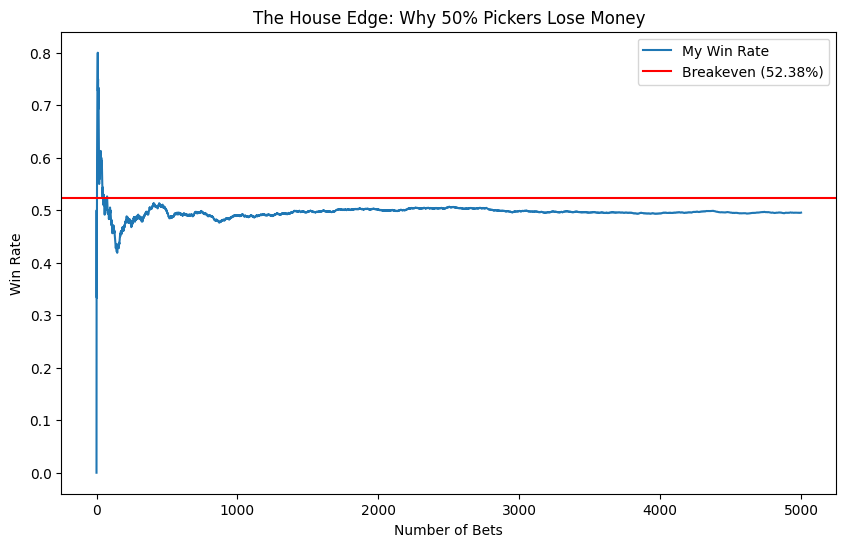

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#setup
true_skill = 0.5
breakeven = 0.5238
n_bets = 5000

#simulate
outcomes = np.random.choice([0,1],size=n_bets,p=[1-true_skill, true_skill])
cumulative_win_rate = np.cumsum(outcomes) / np.arange(1,n_bets+1)

plt.figure(figsize=(10,6))
plt.plot(cumulative_win_rate, label="My Win Rate")
plt.axhline(breakeven, color='red', label="Breakeven (52.38%)")
plt.legend()
plt.title("The House Edge: Why 50% Pickers Lose Money")
plt.xlabel("Number of Bets")
plt.ylabel("Win Rate")
plt.show()

Sampling Error

In [5]:
true_mu = 0.3527 #true population mean

#3 distinct samples
samples = []
for i in range(3):
  #50 random bets using normal dist
  sample = np.random.normal(loc=true_mu, scale=0.5, size=50)

  #calculate stats
  x_bar = sample.mean()
  error = x_bar - true_mu

  print(f"Sample {i+1}: Mean = {x_bar:.2%} | Error = {error:+.2%}")
  samples.append(x_bar)


Sample 1: Mean = 36.01% | Error = +0.74%
Sample 2: Mean = 39.42% | Error = +4.15%
Sample 3: Mean = 27.51% | Error = -7.76%


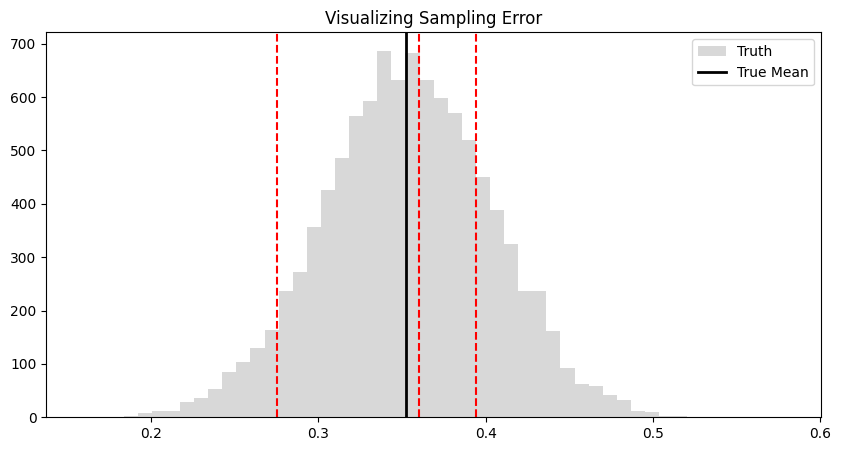

In [6]:
plt.figure(figsize=(10,5))
plt.hist(np.random.normal(true_mu, 0.05, 10000), bins=50, alpha=0.3, color='gray', label='Truth')
for mean in samples:
    plt.axvline(mean, color='red', linestyle='--') # Our Samples
plt.axvline(true_mu, color='black', linewidth=2, label='True Mean')
plt.title("Visualizing Sampling Error")
plt.legend()
plt.show()

Central Limit Theorem

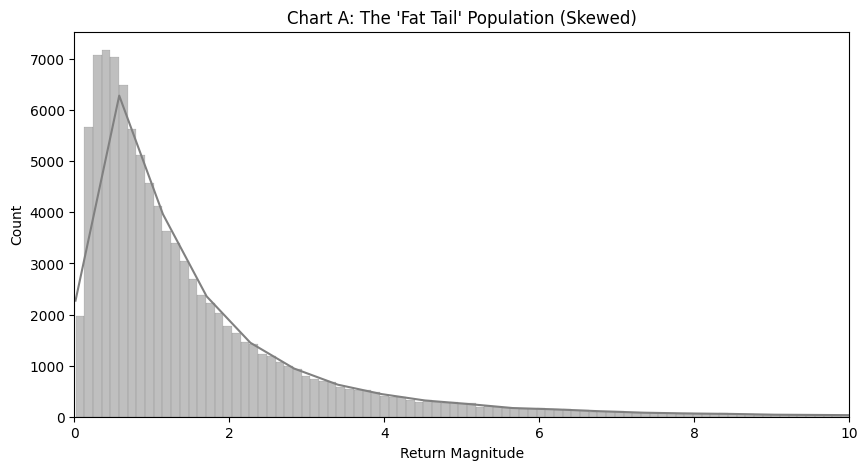

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

population_data = np.random.lognormal(mean=0,sigma=1,size=100000)

plt.figure(figsize=(10,5))

sns.histplot(population_data, bins=1000, kde=True, color='grey')
plt.xlim(0, 10)  # Crop to see the shape clearly
plt.title("Chart A: The 'Fat Tail' Population (Skewed)")
plt.xlabel("Return Magnitude")
plt.show()

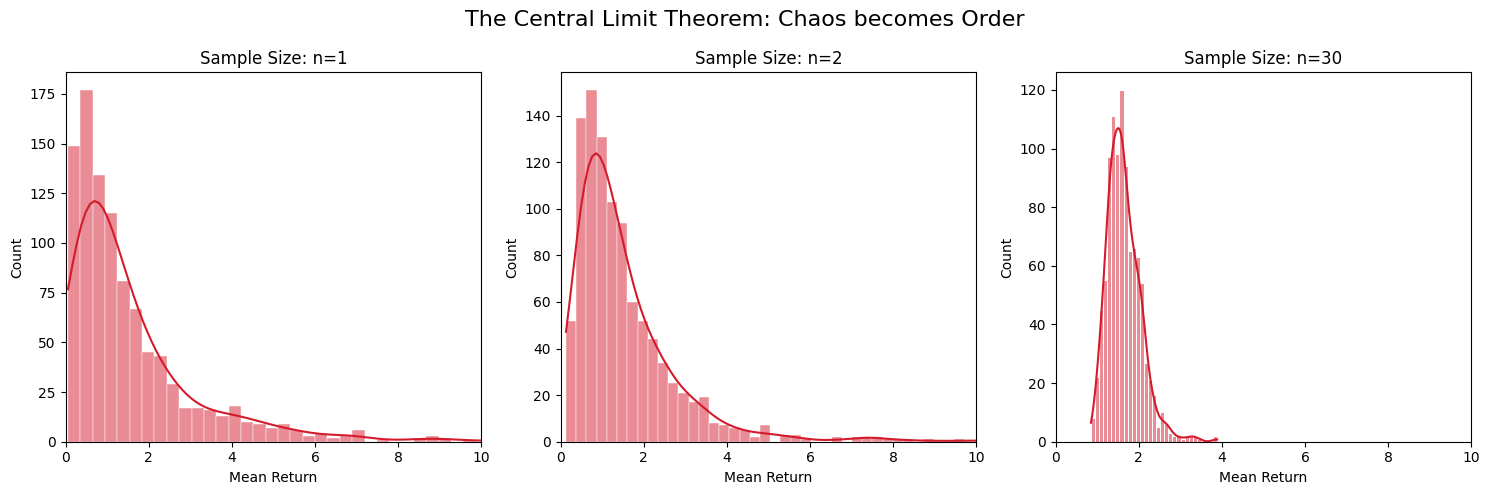

In [12]:
sample_sizes = [1,2,30]
simulations = 1000

plt.figure(figsize=(15,5))

for i, n in enumerate(sample_sizes):
  means = []
  for _ in range(simulations):
    sample = np.random.choice(population_data, size=n)
    means.append(np.mean(sample))

  plt.subplot(1,3,i+1)
  sns.histplot(means, kde=True, color='#d41b2c', edgecolor='white')
  plt.title(f"Sample Size: n={n}")
  plt.xlabel("Mean Return")
  plt.xlim(0, 10)

plt.suptitle("The Central Limit Theorem: Chaos becomes Order", fontsize=16)
plt.tight_layout()
plt.show()